   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 143.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 169.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.4 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:82: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


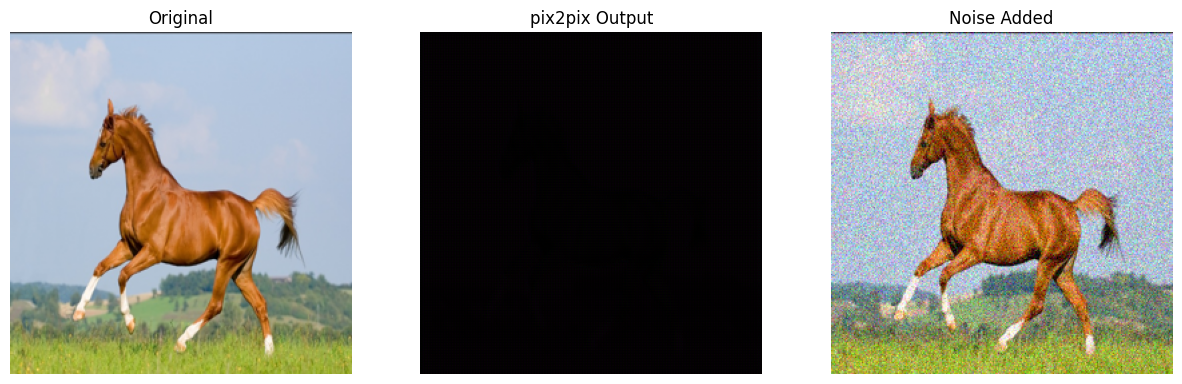

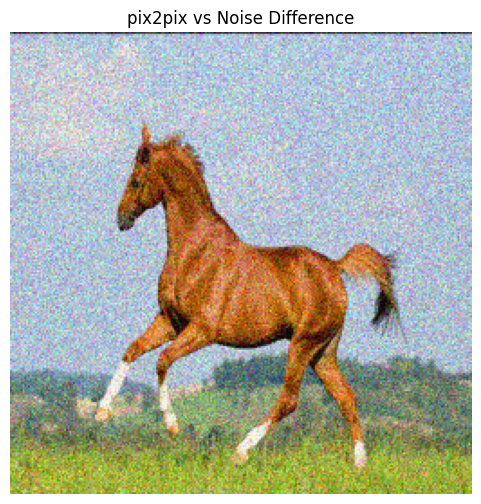

In [ ]:
# 安裝 TensorFlow 和範例模組
!pip install -q tensorflow tensorflow_examples matplotlib pillow

# 匯入套件
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow_examples.models.pix2pix import pix2pix
from PIL import Image

# ✅ 直接指定圖片路徑（取代上傳）
image_path = "/content/drive/MyDrive/A32C58165B8BC0CDC12E54B723ED8A2C4569913E.jpg"

# 讀取與前處理
img = Image.open(image_path).resize((256, 256))
img = np.array(img) / 255.0
input_image = tf.expand_dims(img, axis=0)

# 建立 pix2pix 生成器
generator = pix2pix.unet_generator(output_channels=3)

# ⚠️ 如果你有訓練好的模型才載入權重
# generator.load_weights('your_trained_model_path.h5')

# 模擬 pix2pix 輸出（尚未訓練）
pix2pix_output = generator(input_image)

# 自訂 loss function 權重 λ
lambda_cycle = 10.0  # 可調成 5.0 或 0.1

# 定義 cycle-consistency loss（簡化版）
def cycle_loss(real_image, cycled_image, lambda_cycle):
    loss = tf.reduce_mean(tf.abs(real_image - cycled_image))
    return lambda_cycle * loss

# 模擬生成結果（加入 noise 模擬風格變化）
noise = tf.random.normal(
    shape=tf.shape(input_image), mean=0.0,
    stddev=1.0/lambda_cycle, dtype=input_image.dtype
)
generated_image = tf.clip_by_value(input_image + noise, 0.0, 1.0)

# 顯示結果
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(tf.squeeze(input_image))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("pix2pix Output")
plt.imshow(tf.squeeze(tf.clip_by_value(pix2pix_output, 0.0, 1.0)))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Noise Added")
plt.imshow(tf.squeeze(generated_image))
plt.axis('off')

plt.show()

# 差異圖
difference_map = tf.abs(tf.cast(pix2pix_output, generated_image.dtype) - generated_image)

plt.figure(figsize=(6, 6))
plt.title("pix2pix vs Noise Difference")
plt.imshow(tf.squeeze(tf.clip_by_value(difference_map, 0.0, 1.0)))
plt.axis('off')
plt.show()


🔼 請上傳圖片（.jpg/.png/...）與可選的模型權重（.h5）。若不想上傳，請直接關閉/取消視窗。


Saving A32C58165B8BC0CDC12E54B723ED8A2C4569913E.jpg to A32C58165B8BC0CDC12E54B723ED8A2C4569913E (12).jpg
✅ 使用上傳圖片：A32C58165B8BC0CDC12E54B723ED8A2C4569913E (12).jpg
ℹ️ 找不到模型權重或未設定 MODEL_PATH，將使用未訓練權重。
ℹ️ 未載入任何權重：使用未訓練權重進行示範。


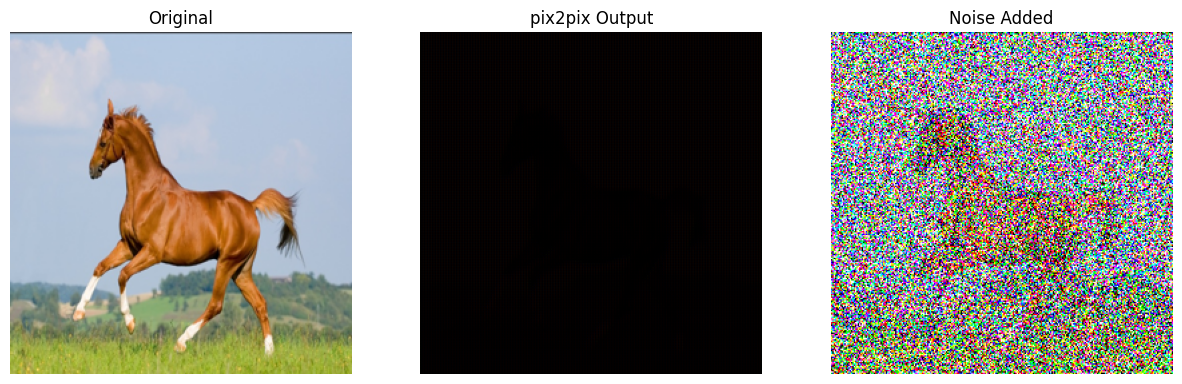

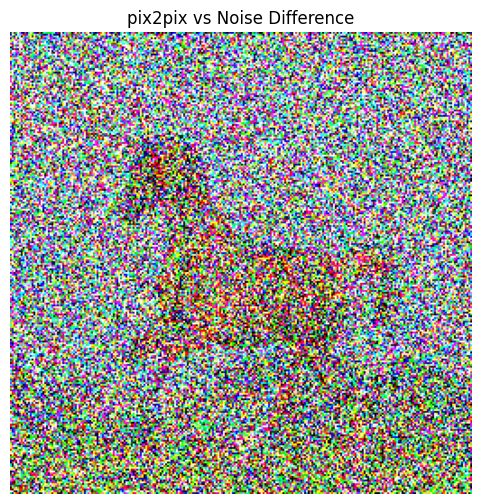

In [ ]:
# === 安裝必要套件（Colab 建議保留）===
!pip install -q tensorflow tensorflow_examples matplotlib pillow

# === 匯入套件 ===
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow_examples.models.pix2pix import pix2pix

# Colab 介面
from google.colab import files, drive

# === 參數設定（可自行調整）===
DRIVE_IMAGE_PATH = "/content/drive/MyDrive/A32C58165B8BC0CDC12E54B723ED8A2C4569913E.jpg"  # 預設圖片路徑
DRIVE_MODEL_PATH = "/content/drive/MyDrive/my_pix2pix_model.h5"  # 預設模型權重（可留不存在）
LAMBDA_CYCLE = 0.8  # 可改 5.0 或 0.1

# === 輔助：掛載 Drive（必要時才掛）===
def ensure_drive_mounted():
    if not os.path.exists("/content/drive") or not os.path.ismount("/content/drive"):
        drive.mount('/content/drive', force_remount=True)

# === 1) 上傳檔案（可一次上傳：圖片 + 可選 .h5 權重）===
print("🔼 請上傳圖片（.jpg/.png/...）與可選的模型權重（.h5）。若不想上傳，請直接關閉/取消視窗。")
uploaded = files.upload()  # 若使用者取消，會回傳空 dict

image_path = None
model_path = None

if uploaded:
    # 依副檔名辨識
    img_exts = {".jpg", ".jpeg", ".png", ".bmp", ".webp"}
    h5_exts = {".h5"}

    uploaded_files = list(uploaded.keys())

    # 找圖片
    for fname in uploaded_files:
        ext = os.path.splitext(fname)[1].lower()
        if ext in img_exts:
            image_path = fname
            break

    # 找模型
    for fname in uploaded_files:
        ext = os.path.splitext(fname)[1].lower()
        if ext in h5_exts:
            model_path = fname
            break

    if image_path:
        print(f"✅ 使用上傳圖片：{image_path}")
    else:
        print("ℹ️ 未偵測到上傳圖片，改用 Google Drive 預設路徑。")

    if model_path:
        print(f"✅ 使用上傳模型權重：{model_path}")

# === 2) 若沒有上傳圖片則改用 Drive 圖片 ===
if image_path is None:
    ensure_drive_mounted()
    if not os.path.exists(DRIVE_IMAGE_PATH):
        raise FileNotFoundError(
            f"找不到預設圖片：{DRIVE_IMAGE_PATH}\n"
            "請上傳圖片，或把 DRIVE_IMAGE_PATH 改成正確路徑。"
        )
    image_path = DRIVE_IMAGE_PATH
    print(f"✅ 使用雲端圖片：{image_path}")

# === 3) 決定模型權重來源：上傳優先，其次 Drive，最後使用未訓練權重 ===
if model_path is None:
    # 嘗試用 Drive 權重
    ensure_drive_mounted()
    if os.path.exists(DRIVE_MODEL_PATH):
        model_path = DRIVE_MODEL_PATH
        print(f"✅ 使用雲端模型權重：{model_path}")
    else:
        print("ℹ️ 找不到模型權重或未設定 MODEL_PATH，將使用未訓練權重。")

# === 4) 讀取與前處理圖片 ===
img = Image.open(image_path).convert("RGB").resize((256, 256))
img = np.array(img, dtype=np.float32) / 255.0
input_image = tf.expand_dims(img, axis=0)  # [1, 256, 256, 3]

# === 5) 建立 pix2pix 生成器 → 視需要載入權重 ===
generator = pix2pix.unet_generator(output_channels=3)

if model_path is not None and os.path.exists(model_path):
    try:
        generator.load_weights(model_path)
        print(f"✅ 已載入模型權重：{model_path}")
    except Exception as e:
        print(f"⚠️ 載入權重失敗（改用未訓練權重繼續）：{e}")
else:
    # 明確提示（這不是錯誤）
    print("ℹ️ 未載入任何權重：使用未訓練權重進行示範。")

# === 6) 前向推論（未訓練模型僅示範流程）===
pix2pix_output = generator(input_image, training=False)

# === 7) 簡化版 cycle-consistency loss 與噪音模擬 ===
def cycle_loss(real_image, cycled_image, lambda_cycle: float):
    loss = tf.reduce_mean(tf.abs(real_image - cycled_image))
    return lambda_cycle * loss

noise = tf.random.normal(
    shape=tf.shape(input_image), mean=0.0,
    stddev=1.0 / float(LAMBDA_CYCLE), dtype=input_image.dtype
)
generated_image = tf.clip_by_value(input_image + noise, 0.0, 1.0)

# === 8) 視覺化 ===
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1); plt.title("Original"); plt.imshow(tf.squeeze(input_image)); plt.axis('off')
plt.subplot(1, 3, 2); plt.title("pix2pix Output"); plt.imshow(tf.squeeze(tf.clip_by_value(pix2pix_output, 0.0, 1.0))); plt.axis('off')
plt.subplot(1, 3, 3); plt.title("Noise Added"); plt.imshow(tf.squeeze(generated_image)); plt.axis('off')
plt.show()

difference_map = tf.abs(tf.cast(pix2pix_output, generated_image.dtype) - generated_image)
plt.figure(figsize=(6, 6))
plt.title("pix2pix vs Noise Difference")
plt.imshow(tf.squeeze(tf.clip_by_value(difference_map, 0.0, 1.0)))
plt.axis('off')
plt.show()


📷 請上傳『馬（content）』


Saving A32C58165B8BC0CDC12E54B723ED8A2C4569913E.jpg to A32C58165B8BC0CDC12E54B723ED8A2C4569913E (35).jpg
🦓 請上傳『斑馬（style）』


Saving z1.jpg to z1 (7).jpg
嘗試載入 TF Hub（1/3）…
✅ 載入成功
✅ 任意風格遷移完成
⚠️ rembg 自動遮罩失敗：No module named 'onnxruntime'
ℹ️ 無法取得遮罩，將不使用遮罩（背景可能略帶紋理）


/tmp/ipython-input-1858011511.py:307: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.show()
/tmp/ipython-input-1858011511.py:307: UserWarning: Glyph 39340 (\N{CJK UNIFIED IDEOGRAPH-99AC}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.show()
/tmp/ipython-input-1858011511.py:307: UserWarning: Glyph 26001 (\N{CJK UNIFIED IDEOGRAPH-6591}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.show()
/tmp/ipython-input-1858011511.py:307: UserWarning: Glyph 34389 (\N{CJK UNIFIED IDEOGRAPH-8655}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.show()
/tmp/ipython-input-1858011511.py:307: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.show()
/tmp/ipython-input-1858011511.py:307: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.show()
/tmp/ipython-input-1858011511.py:

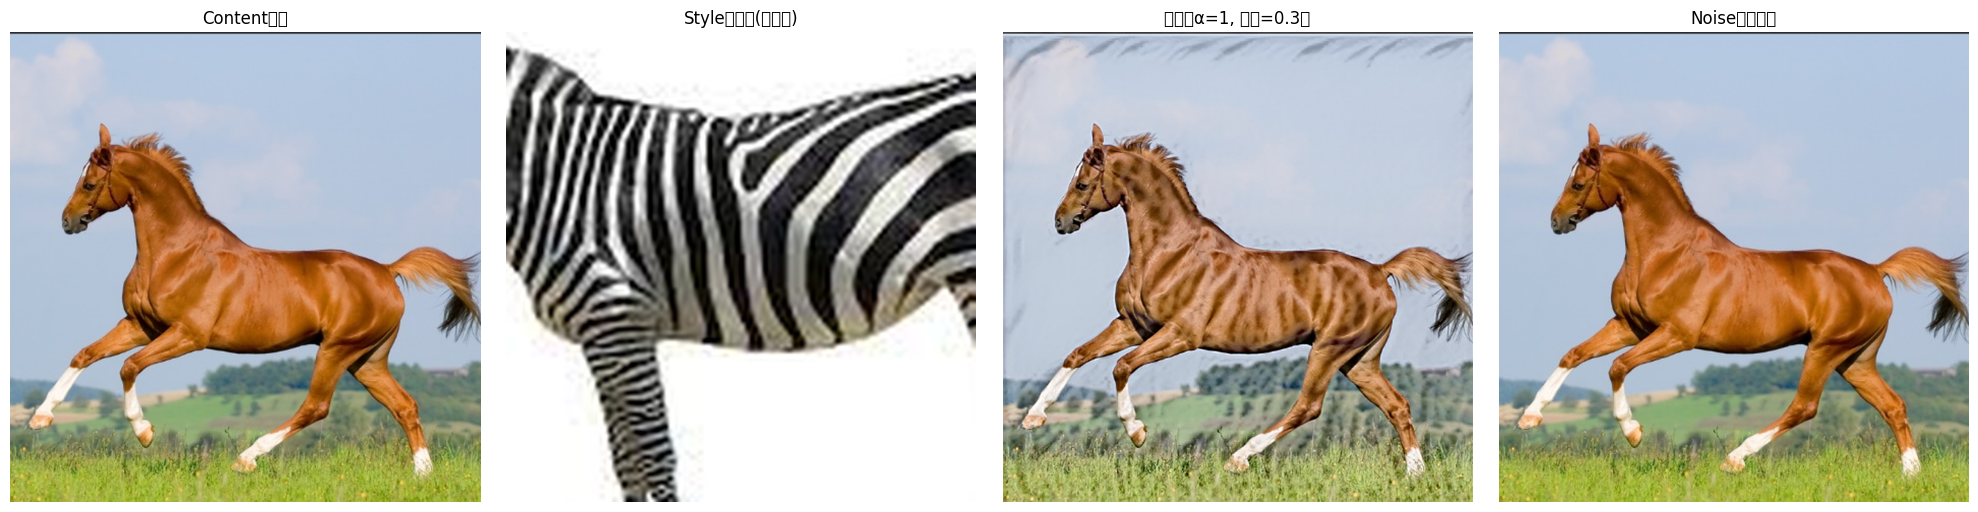


🧾 已存到 /content/results：
  - content: /content/results/horse_to_zebra_final_content.png
  - style: /content/results/horse_to_zebra_final_style.png
  - output: /content/results/horse_to_zebra_final_output.png
📦 已備份到 Drive: /content/drive/MyDrive/pix2pix_results

🎉 完成！想更『斑馬』就把 BLEND_ALPHA→0.95；想更保留馬臉細節→降到 0.88。


In [ ]:
# ==========================================
# 馬 ➜ 斑馬條紋（終極整合版：自動遮罩 + 遮罩強化 + 身體取樣 + 銳化）
# - 上傳：馬（content）＋ 斑馬（style）
# - 只取斑馬「身體」做風格來源，避免天空/草地汙染
# - rembg 自動生遮罩 + OpenCV 強化（最大連通區/開閉運算/羽化）
# - 條紋銳化（unsharp）＋ 與原圖權重混合
# - TF Hub 任意風格遷移失敗自動回退
# - 輸出存 /content/results 與 Drive（若掛載）
# ==========================================
!pip -q install tensorflow tensorflow_hub pillow matplotlib rembg opencv-python-headless

import os, io, time, urllib.request
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
from google.colab import files, drive
import cv2  # 遮罩強化需用

# ============== 可調參數（已替你調到好用的預設） ==============
IMG_SIZE = 768             # 顯存吃緊→ 512；要更細緻→ 1024
PRESERVE_ASPECT = True     # 等比縮放 + 正方裁切

# 風格與混合
BLEND_ALPHA = 1         # 0~1：越大條紋越強
STYLE_STRENGTH = 0.3       # 0~1：Hub輸出與原圖插值（1.0 最強）

# 風格來源處理
STYLE_BODY_ONLY = True     # 只取斑馬身體（自動裁切避免草地/天空）
SHARPEN_STRIPES = True     # 條紋銳化
SHARPEN_AMOUNT = 1.2       # 1.0~1.8 建議

# 遮罩控制
USE_MASK = True            # True：只在馬身套條紋
MASK_PATH = "mask.png"     # 若提供手繪遮罩優先用（白=馬，黑=背景）
AUTO_MASK_FALLBACK = True  # 沒有 mask.png 時，用 rembg 自動生
# 遮罩強化超參（視狀況微調）
ERODE_PX   = 4             # 侵蝕：收掉毛邊/雜點
DILATE_PX  = 10            # 膨脹：補回主體
FEATHER_PX = 12            # 羽化：邊緣柔順
KEEP_LARGEST = True        # 只保留最大連通區（通常是馬）

# I/O 來源
CONTENT_SOURCE = 'upload'  # 'upload' | 'drive' | 'url'
STYLE_SOURCE   = 'upload'  # 'upload' | 'drive' | 'url' | 'same_as_content'
DRIVE_CONTENT_PATH = ""
DRIVE_STYLE_PATH   = ""
CONTENT_URL = ""
STYLE_URL   = ""

# 其他
ADD_NOISE = False
NOISE_STD = 0.06
SEED = 42
FORCE_SIMPLE_MIX = False
SAVE_BASENAME = "horse_to_zebra_final"
# ============================================================

# ---------------- 工具函式 ----------------
def ensure_drive_mounted():
    if not os.path.ismount("/content/drive"):
        drive.mount('/content/drive', force_remount=True)

def set_seed(s=42):
    tf.random.set_seed(s); np.random.seed(s)

def upload_one_file(prompt):
    print(prompt)
    up = files.upload()
    if not up: raise RuntimeError("未上傳任何檔案。")
    return list(up.keys())[0]

def load_image_from_path(p): return Image.open(p).convert("RGB")

def load_image_from_url(url):
    with urllib.request.urlopen(url) as r: data = r.read()
    return Image.open(io.BytesIO(data)).convert("RGB")

def center_square_crop(img):
    w, h = img.size
    s = min(w, h)
    x0, y0 = (w-s)//2, (h-s)//2
    return img.crop((x0, y0, x0+s, y0+s))

def pil_to_tensor(img, size=256, preserve_aspect=True):
    if preserve_aspect: img = center_square_crop(img)
    img = img.resize((size, size), Image.LANCZOS)
    arr = (np.asarray(img, dtype=np.float32)/255.0)[None, ...]  # [1,H,W,3]
    return tf.convert_to_tensor(arr)

def tensor_to_pil(t):
    arr = np.clip(tf.squeeze(t).numpy(), 0, 1)
    return Image.fromarray((arr*255).astype(np.uint8))

def show_img(t, title):
    plt.title(title); plt.imshow(tf.squeeze(tf.clip_by_value(t,0,1))); plt.axis('off')

def try_load_hub_model(retries=3, sleep_sec=4):
    url = "https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2"
    for i in range(1, retries+1):
        try:
            print(f"嘗試載入 TF Hub（{i}/{retries}）…")
            m = hub.load(url); print("✅ 載入成功"); return m
        except Exception as e:
            print(f"⚠️ 失敗：{e}"); time.sleep(sleep_sec)
    print("❌ 多次嘗試失敗，改用簡單混合"); return None

def save_all(img_dict, basename):
    os.makedirs("/content/results", exist_ok=True)
    out = {}
    for k, im in img_dict.items():
        p = f"/content/results/{basename}_{k}.png"
        im.save(p, "PNG"); out[k] = p
    print("\n🧾 已存到 /content/results：")
    for k, p in out.items(): print(f"  - {k}: {p}")
    if os.path.ismount("/content/drive"):
        d = "/content/drive/MyDrive/pix2pix_results"
        os.makedirs(d, exist_ok=True)
        for k, im in img_dict.items(): im.save(f"{d}/{basename}_{k}.png", "PNG")
        print(f"📦 已備份到 Drive: {d}")
    return out

def unsharp(pil_img: Image.Image, amount=1.2, radius=2):
    blur = pil_img.filter(ImageFilter.GaussianBlur(radius))
    arr  = np.asarray(pil_img, dtype=np.float32)
    barr = np.asarray(blur,     dtype=np.float32)
    out  = np.clip(arr + amount*(arr - barr), 0, 255).astype(np.uint8)
    return Image.fromarray(out)

def auto_style_body_crop(img: Image.Image):
    # 取中間 70% x 60%，多半是斑馬身體；再正方裁切
    w, h = img.size
    x0, x1 = int(w*0.15), int(w*0.85)
    y0, y1 = int(h*0.20), int(h*0.80)
    return center_square_crop(img.crop((x0, y0, x1, y1)))

def make_mask_from_image_with_rembg(pil_img: Image.Image, size=IMG_SIZE):
    """用 rembg 取前景作為遮罩；白=馬，黑=背景"""
    try:
        from rembg import remove
        rgba = remove(pil_img.convert("RGB"))
        if rgba.mode != "RGBA":
            rgba = rgba.convert("RGBA")
        a = rgba.split()[-1]                 # alpha 當遮罩
        a = center_square_crop(a) if PRESERVE_ASPECT else a
        a = a.resize((size, size), Image.LANCZOS)
        arr = (np.asarray(a, dtype=np.float32)/255.0)[None, ..., None]  # [1,H,W,1]
        return arr
    except Exception as e:
        print(f"⚠️ rembg 自動遮罩失敗：{e}")
        return None

def refine_mask_pil(mask_pil: Image.Image,
                    size: int,
                    erode_px: int = 4,
                    dilate_px: int = 10,
                    feather_px: int = 12,
                    keep_largest: bool = True) -> np.ndarray:
    """
    PIL 單通道遮罩(白=前景) -> 乾淨、平滑的 [1,H,W,1] float32 遮罩, 值域[0,1]
    - 二值化 + 最大連通區（只留馬）
    - 形態學侵蝕/膨脹（收毛邊、補主體）
    - 高斯羽化（邊緣柔順）
    """
    m = mask_pil.convert("L").resize((size, size), Image.LANCZOS)
    m = np.asarray(m, dtype=np.uint8)

    # 1) 二值化
    _, bw = cv2.threshold(m, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 2) 最大連通區
    if keep_largest:
        nb, labels, stats, _ = cv2.connectedComponentsWithStats(bw, connectivity=8)
        if nb > 1:  # 0 是背景
            areas = stats[1:, cv2.CC_STAT_AREA]
            largest_id = 1 + np.argmax(areas)
            bw = np.where(labels == largest_id, 255, 0).astype(np.uint8)

    # 3) 形態學處理
    if erode_px > 0:
        k = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (erode_px, erode_px))
        bw = cv2.erode(bw, k, iterations=1)
    if dilate_px > 0:
        k = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (dilate_px, dilate_px))
        bw = cv2.dilate(bw, k, iterations=1)

    # 4) 羽化
    if feather_px > 0:
        bw = cv2.GaussianBlur(bw, (0, 0), sigmaX=feather_px, sigmaY=feather_px)

    mask_f = (bw.astype(np.float32) / 255.0)[None, ..., None]
    return mask_f

# ---------------- 主流程 ----------------
set_seed(SEED)

# Content（馬）
if CONTENT_SOURCE == 'upload':
    cpath = upload_one_file("📷 請上傳『馬（content）』")
    content_pil = load_image_from_path(cpath)
elif CONTENT_SOURCE == 'drive':
    ensure_drive_mounted()
    if not DRIVE_CONTENT_PATH or not os.path.exists(DRIVE_CONTENT_PATH):
        raise FileNotFoundError("找不到 content 圖")
    content_pil = load_image_from_path(DRIVE_CONTENT_PATH)
elif CONTENT_SOURCE == 'url':
    if not CONTENT_URL: raise ValueError("請提供 CONTENT_URL")
    content_pil = load_image_from_url(CONTENT_URL)
else:
    raise ValueError("CONTENT_SOURCE 設定錯誤")

# Style（斑馬）
if STYLE_SOURCE == 'upload':
    spath = upload_one_file("🦓 請上傳『斑馬（style）』")
    style_pil = load_image_from_path(spath)
elif STYLE_SOURCE == 'drive':
    ensure_drive_mounted()
    if not DRIVE_STYLE_PATH or not os.path.exists(DRIVE_STYLE_PATH):
        raise FileNotFoundError("找不到 style 圖")
    style_pil = load_image_from_path(DRIVE_STYLE_PATH)
elif STYLE_SOURCE == 'url':
    if not STYLE_URL: raise ValueError("請提供 STYLE_URL")
    style_pil = load_image_from_url(STYLE_URL)
elif STYLE_SOURCE == 'same_as_content':
    style_pil = content_pil.copy()
else:
    raise ValueError("STYLE_SOURCE 設定錯誤")

# 只取斑馬「身體」做風格（避免把草地/天空帶進來）
if STYLE_BODY_ONLY:
    style_pil = auto_style_body_crop(style_pil)

# Tensor 化
content = pil_to_tensor(content_pil, IMG_SIZE, PRESERVE_ASPECT)
style   = pil_to_tensor(style_pil,   IMG_SIZE, PRESERVE_ASPECT)

# 風格遷移
if FORCE_SIMPLE_MIX:
    stylized = style
    print("⏭️ 已設定 FORCE_SIMPLE_MIX=True，直接簡單混合")
else:
    model = try_load_hub_model()
    if model is not None:
        stylized = model(
            tf.image.convert_image_dtype(content, tf.float32),
            tf.image.convert_image_dtype(style,   tf.float32)
        )[0]
        if 0.0 <= STYLE_STRENGTH < 1.0:
            stylized = STYLE_STRENGTH * stylized + (1.0 - STYLE_STRENGTH) * content
        print("✅ 任意風格遷移完成")
    else:
        stylized = style
        print("ℹ️ 使用簡單混合（非正統風格轉移）")

# 條紋銳化
if SHARPEN_STRIPES:
    stylized_pil = tensor_to_pil(stylized)
    stylized_pil = unsharp(stylized_pil, amount=SHARPEN_AMOUNT, radius=2)
    stylized = pil_to_tensor(stylized_pil, IMG_SIZE, preserve_aspect=False)

# 與原圖混合（強調條紋）
output = tf.clip_by_value(BLEND_ALPHA * stylized + (1.0 - BLEND_ALPHA) * content, 0.0, 1.0)

# 遮罩：只讓馬身有條紋（加強版）
mask_tensor = None
if USE_MASK:
    raw_mask_pil = None

    # 1) 若有上傳 mask.png，優先用
    if os.path.exists(MASK_PATH):
        raw_mask_pil = Image.open(MASK_PATH).convert("L")
        print("🎯 使用上傳遮罩 mask.png")
    # 2) 否則 rembg 自動生遮罩（用 content 圖）
    elif AUTO_MASK_FALLBACK:
        arr = make_mask_from_image_with_rembg(content_pil, size=IMG_SIZE)
        if arr is not None:
            raw_mask_pil = Image.fromarray((arr[0,...,0]*255).astype(np.uint8), mode="L")
            print("🤖 使用 rembg 自動遮罩")

    if raw_mask_pil is not None:
        mask_np = refine_mask_pil(
            raw_mask_pil, size=IMG_SIZE,
            erode_px=ERODE_PX, dilate_px=DILATE_PX,
            feather_px=FEATHER_PX, keep_largest=KEEP_LARGEST
        )  # [1,H,W,1] float32
        mask_tensor = tf.convert_to_tensor(mask_np, dtype=output.dtype)

    if mask_tensor is not None:
        output = tf.clip_by_value(mask_tensor * output + (1.0 - mask_tensor) * content, 0.0, 1.0)
    else:
        print("ℹ️ 無法取得遮罩，將不使用遮罩（背景可能略帶紋理）")

# （選用）噪聲視覺化
if ADD_NOISE:
    noise = tf.random.normal(tf.shape(content), stddev=NOISE_STD, dtype=content.dtype)
    noise_view = tf.clip_by_value(content + noise, 0.0, 1.0)
else:
    noise_view = content

# 視覺化
plt.figure(figsize=(20,5))
plt.subplot(1,4,1); show_img(content, "Content：馬")
plt.subplot(1,4,2); show_img(style,   "Style：斑馬(處理後)")
plt.subplot(1,4,3); show_img(output,  f"輸出（α={BLEND_ALPHA}, 強度={STYLE_STRENGTH}）")
plt.subplot(1,4,4); show_img(noise_view, "Noise（展示）")
plt.tight_layout(); plt.show()

# （選用）遮罩疊圖檢查
try:
    if USE_MASK and mask_tensor is not None:
        mask_vis = tf.squeeze(mask_tensor).numpy()  # [H,W]
        base = np.asarray(tensor_to_pil(content))
        overlay = base.copy()
        overlay[..., 2] = np.maximum(overlay[..., 2], (mask_vis*255).astype(np.uint8))  # 紅通道疊加
        overlay = (0.6*base + 0.4*overlay).astype(np.uint8)
        plt.figure(figsize=(4,4)); plt.title("Mask Overlay"); plt.imshow(overlay); plt.axis('off'); plt.show()
except:
    pass

# 存檔
imgs = {"content": tensor_to_pil(content),
        "style":   tensor_to_pil(style),
        "output":  tensor_to_pil(output)}
if ADD_NOISE: imgs["noise"] = tensor_to_pil(noise_view)
save_all(imgs, SAVE_BASENAME)

print("\n🎉 完成！想更『斑馬』就把 BLEND_ALPHA→0.95；想更保留馬臉細節→降到 0.88。")


In [ ]:
import os

# Define the path to the dataset
PATH = '/content/facades/'

# Function to load and preprocess images
def load_image(image_file):
    # Read and decode an image file to a uint8 tensor
    image = tf.io.read_file(image_file)
    image = tf.image.decode_jpeg(image)

    # Split the image into input and target images
    w = tf.shape(image)[1]
    w = w // 2
    input_image = image[:, w:, :]
    real_image = image[:, :w, :]

    # Convert 16 bit to 8 bit
    input_image = tf.cast(input_image, tf.float32)
    real_image = tf.cast(real_image, tf.float32)

    return input_image, real_image

# Function to resize and normalize images
def resize(input_image, real_image, height, width):
    input_image = tf.image.resize(input_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    real_image = tf.image.resize(real_image, [height, width],
                               method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

    return input_image, real_image

def normalize(input_image, real_image):
    input_image = (input_image / 127.5) - 1
    real_image = (real_image / 127.5) - 1

    return input_image, real_image

@tf.function()
def random_jitter(input_image, real_image):
    # Resizing to 286x286
    input_image, real_image = resize(input_image, real_image, 286, 286)

    # Random cropping to 256x256
    stacked_image = tf.stack([input_image, real_image], axis=0)
    cropped_image = tf.image.random_crop(
        stacked_image, size=[2, 256, 256, 3])

    input_image, real_image = cropped_image[0], cropped_image[1]

    # Random mirroring
    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        real_image = tf.image.flip_left_right(real_image)

    return input_image, real_image

# Function to load and preprocess the train and test datasets
def load_train_image(image_file):
    input_image, real_image = load_image(image_file)
    input_image, real_image = random_jitter(input_image, real_image)
    input_image, real_image = normalize(input_image, real_image)
    return input_image, real_image

def load_test_image(image_file):
    input_image, real_image = load_image(image_file)
    input_image, real_image = resize(input_image, real_image, 256, 256)
    input_image, real_image = normalize(input_image, real_image)
    return input_image, real_image

# Create the training and test datasets
BUFFER_SIZE = 400
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256

train_dataset = tf.data.Dataset.list_files(PATH + 'train/*.jpg')
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.map(load_train_image,
                                  num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.batch(BATCH_SIZE)

test_dataset = tf.data.Dataset.list_files(PATH + 'test/*.jpg')
test_dataset = test_dataset.map(load_test_image)
test_dataset = test_dataset.batch(BATCH_SIZE)

# Display an example from the training dataset
for input_example, real_example in train_dataset.take(1):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Input Image")
    plt.imshow(input_example[0] * 0.5 + 0.5)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Real Image")
    plt.imshow(real_example[0] * 0.5 + 0.5)
    plt.axis('off')
    plt.show()

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: /content/facades/train/*.jpg'

⚠️ 未找到影像，為你下載官方 facades 資料集...
30168306/30168306 ━━━━━━━━━━━━━━━━━━━━ 31s 1us/step


/tmp/ipython-input-3310591388.py:33: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path='/content')


✅ 下載並解壓完成。
📦 影像數量：train=400, test=106


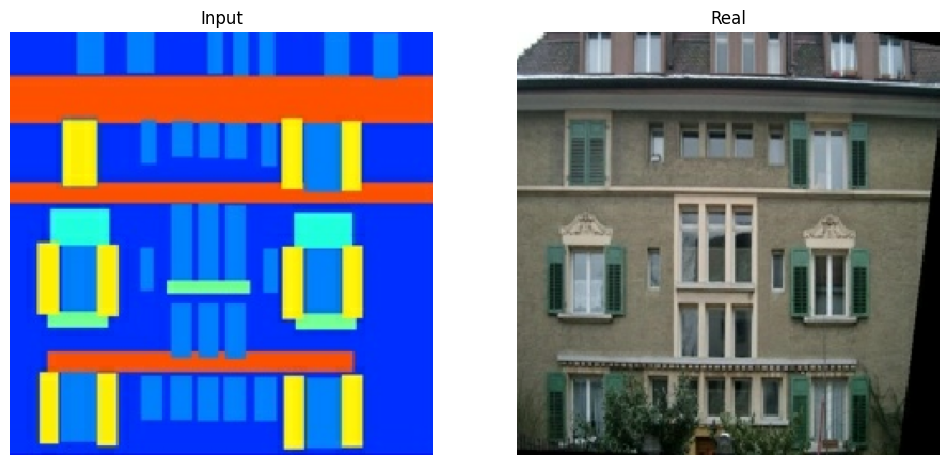

In [ ]:
# -*- coding: utf-8 -*-
import os, tarfile
import tensorflow as tf
import matplotlib.pyplot as plt
import urllib.request

# === 1) 基本設定 ===
PATH = '/content/facades/'
TRAIN_DIR = os.path.join(PATH, 'train')
TEST_DIR  = os.path.join(PATH, 'test')

os.makedirs(TRAIN_DIR, exist_ok=True)
os.makedirs(TEST_DIR,  exist_ok=True)

# === 2) 若無影像，自動下載 facades 資料集並解壓 ===
def ensure_facades_dataset():
    def has_images(d):
        return bool(tf.io.gfile.glob(os.path.join(d, '*.jpg')) +
                    tf.io.gfile.glob(os.path.join(d, '*.png')))
    if has_images(TRAIN_DIR) and has_images(TEST_DIR):
        print("✅ 偵測到現有影像，略過下載。")
        return

    print("⚠️ 未找到影像，為你下載官方 facades 資料集...")
    # Updated URL to a known working mirror
    url = 'https://people.eecs.berkeley.edu/~pix2pix/datasets/facades.tar.gz'
    tgz_path = tf.keras.utils.get_file(
        'facades.tar.gz', origin=url, extract=False,
        cache_dir='/content', cache_subdir=''
    )
    # 解壓
    with tarfile.open(tgz_path, 'r:gz') as tar:
        tar.extractall(path='/content')
    # 下載後資料夾就是 /content/facades，裡面含 train/test/val
    assert os.path.isdir(TRAIN_DIR) and os.path.isdir(TEST_DIR), "資料解壓結構異常，請重試。"
    print("✅ 下載並解壓完成。")

ensure_facades_dataset()

# === 3) 檔案蒐集（支援 jpg + png） ===
def get_files(dirpath):
    jpgs = tf.io.gfile.glob(os.path.join(dirpath, '*.jpg'))
    pngs = tf.io.gfile.glob(os.path.join(dirpath, '*.png'))
    files = sorted(jpgs + pngs)
    if not files:
        raise FileNotFoundError(f'在 {dirpath} 找不到 .jpg 或 .png，請確認路徑/網路/前一步是否成功。')
    return files

train_files = get_files(TRAIN_DIR)
test_files  = get_files(TEST_DIR)
print(f"📦 影像數量：train={len(train_files)}, test={len(test_files)}")

# === 4) 讀圖＆前處理（保留你的增強邏輯，但支援 jpg/png） ===
def load_image(image_file):
    img = tf.io.read_file(image_file)
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    img.set_shape([None, None, 3])

    w = tf.shape(img)[1] // 2
    real_image  = tf.cast(img[:, :w, :], tf.float32)   # 左半：target
    input_image = tf.cast(img[:, w:, :], tf.float32)   # 右半：input
    return input_image, real_image

def resize(input_image, real_image, h, w):
    input_image = tf.image.resize(input_image, [h, w], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    real_image  = tf.image.resize(real_image,  [h, w], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    return input_image, real_image

def normalize(input_image, real_image):
    return (input_image / 127.5) - 1.0, (real_image / 127.5) - 1.0

@tf.function
def random_jitter(input_image, real_image):
    input_image, real_image = resize(input_image, real_image, 286, 286)
    stacked = tf.stack([input_image, real_image], axis=0)
    cropped = tf.image.random_crop(stacked, size=[2, 256, 256, 3])
    input_image, real_image = cropped[0], cropped[1]
    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        real_image  = tf.image.flip_left_right(real_image)
    return input_image, real_image

def load_train_image(path):
    x, y = load_image(path)
    x, y = random_jitter(x, y)
    x, y = normalize(x, y)
    return x, y

def load_test_image(path):
    x, y = load_image(path)
    x, y = resize(x, y, 256, 256)
    x, y = normalize(x, y)
    return x, y

# === 5) 建立 Dataset ===
BUFFER_SIZE = 400
BATCH_SIZE  = 1

train_dataset = tf.data.Dataset.from_tensor_slices(train_files)
train_dataset = train_dataset.shuffle(BUFFER_SIZE, reshuffle_each_iteration=True)
train_dataset = train_dataset.map(load_train_image, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices(test_files)
test_dataset = test_dataset.map(load_test_image, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# === 6) 快速目視確認 ===
for inp, real in train_dataset.take(1):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1); plt.title('Input'); plt.imshow((inp[0]*0.5+0.5).numpy().clip(0,1)); plt.axis('off')
    plt.subplot(1,2,2); plt.title('Real');  plt.imshow((real[0]*0.5+0.5).numpy().clip(0,1)); plt.axis('off')
    plt.show()